In [2]:
#Importing necessary libraries required for Zonal Statistics

import pandas as pd
import geopandas as gpd
import rasterio
from rasterio.plot import show
from rasterio.plot import show_hist #histogram
import rasterstats #Zonal Statistics
import matplotlib.pyplot as plt

In [3]:
# Read the grid Shapefile

fn_zones = gpd.read_file(r'new\\zonalstatfirst.shp')

In [4]:
#Read the Rainfall raster 
rf = rasterio.open(r'wc2.1_2.5m_prec_2010-01.tif', mode='r')

In [4]:
#Assign raster values to a numpy nd array

rainfall_array = rf.read(1)

affine = rf.transform

In [6]:
#calculating Zonal statistics

rainfall = rasterstats.zonal_stats(fn_zones, rainfall_array, affine=affine, stats =['mean', 'min', 'max', 'median', 'std', 'sum'], geojson_out=True)


C:\Users\USER\anaconda3\lib\site-packages\rasterstats\io.py:328: NodataWarning: Setting nodata to -999; specify nodata explicitly
  warnings.warn(


In [7]:
#Extracting the average rainfall data from the list

avg_rainfall =[]
i=0

while i< len(rainfall):
    avg_rainfall.append(rainfall[i]['properties'])
    i = i+1

In [8]:
#transfering the information from the list to a pandas dataframe

tamilnadu = pd.DataFrame(avg_rainfall)
print(tamilnadu)

          id       left        top      right     bottom  primary  min  max  \
0       24.0  76.225746  11.640325  76.308746  11.557325        0  2.9  3.2   
1       25.0  76.225746  11.557325  76.308746  11.474325        1  3.4  3.7   
2       90.0  76.308746  11.640325  76.391746  11.557325        2  3.0  3.2   
3       91.0  76.308746  11.557325  76.391746  11.474325        3  3.4  3.7   
4       92.0  76.308746  11.474325  76.391746  11.391325        4  3.9  4.2   
...      ...        ...        ...        ...        ...      ...  ...  ...   
1649  3236.0  80.292746  13.466325  80.375746  13.383325     1649  8.6  9.0   
1650  3237.0  80.292746  13.383325  80.375746  13.300325     1650  9.0  9.4   
1651  3238.0  80.292746  13.300325  80.375746  13.217325     1651  9.3  9.4   
1652  3239.0  80.292746  13.217325  80.375746  13.134325     1652  9.0  9.1   
1653  3240.0  80.292746  13.134325  80.375746  13.051325     1653  8.9  8.9   

          mean        sum       std  median  
0    

In [11]:
#update the zonal statistics attributes to the shapefile

#iterate through rows and update the shapefile attributes

for i, row in fn_zones.iterrows():
    stats = rainfall[i]['properties']
    for stat_name, stat_value in stats.items():
        fn_zones.at[i, stat_name] = stat_value
        
#save the updated shapefile

output_path = r'D:\\cropsuitability\\grid\\new\\zonalstatistics_with_stats.shp'
fn_zones.to_file(output_path)

NameError: name 'plot' is not defined

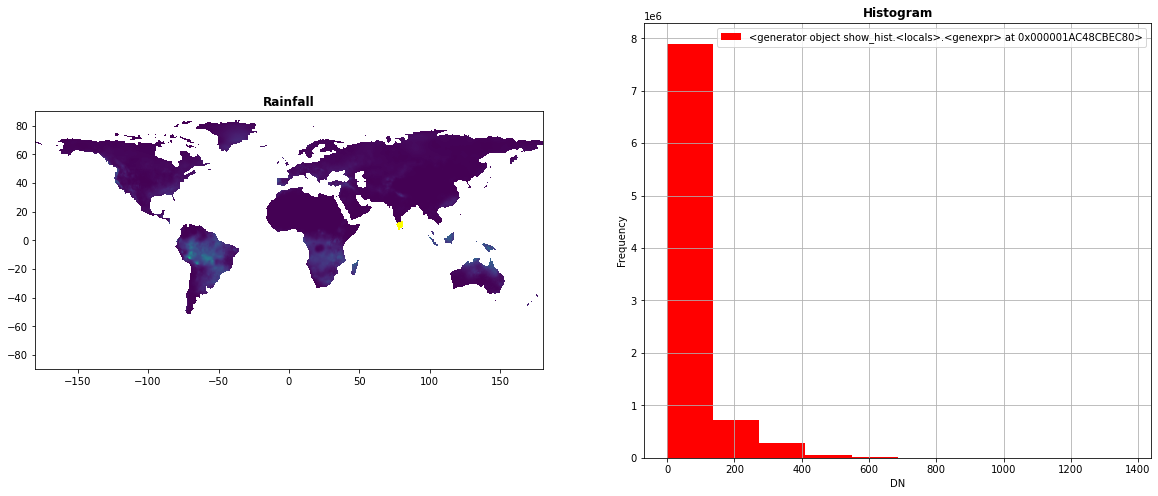

In [8]:
#plotting the raster and grid shapefile together

fig, (ax1, ax2) = plt.subplots(1,2, figsize =(20,8))
show(rf,ax=ax1, title ='Rainfall')
fn_zones.plot(ax=ax1, facecolor ='None', edgecolor ='Yellow')
show_hist(rf, title='Histogram', ax=ax2)
plot.show()

In [13]:
#export the Zonal statistics attributes to an Excel File

output_excelfile="D:\\cropsuitability\\grid\\new\\Zonalstat.xlsx"
tamilnadu.to_excel(output_excelfile, index = False)


In [4]:
print(fn_zones)

          id       left        top      right     bottom  primary  min  max  \
0       24.0  76.225746  11.640325  76.308746  11.557325        0  NaN  NaN   
1       25.0  76.225746  11.557325  76.308746  11.474325        1  NaN  NaN   
2       90.0  76.308746  11.640325  76.391746  11.557325        2  NaN  NaN   
3       91.0  76.308746  11.557325  76.391746  11.474325        3  NaN  NaN   
4       92.0  76.308746  11.474325  76.391746  11.391325        4  NaN  NaN   
...      ...        ...        ...        ...        ...      ...  ...  ...   
1649  3236.0  80.292746  13.466325  80.375746  13.383325     1649  NaN  NaN   
1650  3237.0  80.292746  13.383325  80.375746  13.300325     1650  NaN  NaN   
1651  3238.0  80.292746  13.300325  80.375746  13.217325     1651  NaN  NaN   
1652  3239.0  80.292746  13.217325  80.375746  13.134325     1652  NaN  NaN   
1653  3240.0  80.292746  13.134325  80.375746  13.051325     1653  NaN  NaN   

      mean  sum  std  median  \
0      NaN  NaN  Na